## ML Capstone Project on Air Pollution Datatracker

### Introduction 

	The provided dataset on Kaggle offers comprehensive insights into air quality analysis in the United States from 2000 to 2022. It contains detailed information on key pollutants such as Nitrogen Dioxide (NO2), Sulphur Dioxide (SO2), Carbon Monoxide (CO), and Ozone (O3). This dataset is sourced from the U.S. Environmental Protection Agency (EPA) and includes additional enhancements by Kagglers BrendaSo and ANGELA KIM. Students can leverage this dataset for in-depth research, analysis, and exploration of air quality trends and environmental health studies.

### Business Problem:

	    Comprehensive Analysis and Mitigation Strategy Development for Air Pollution in the United States.

### Title: 
	
	Comprehensive Analysis and Mitigation Strategy Development for Air Pollution in the United States (2000-2023)

### Data Dictionary

	Date: Date of data collection.
	Address: Specific location of data collection.
	State: U.S. state where data was collected.
	County: County within the state of data collection.
	City: City where data was collected.
	O3 Mean: Average Ozone level for the day.
	O3 1st Max Value: Highest Ozone level for the day.
	O3 1st Max Hour: Hour of highest Ozone level.
	O3 AQI: Air Quality Index for Ozone.
	CO Mean: Average Carbon Monoxide level for the day.
	CO 1st Max Value: Highest Carbon Monoxide level for the day.
	CO 1st Max Hour: Hour of highest Carbon Monoxide level.
	CO AQI: Air Quality Index for Carbon Monoxide.
	SO2 Mean: Average Sulphur Dioxide level for the day.
	SO2 1st Max Value: Highest Sulphur Dioxide level for the day.
	SO2 1st Max Hour: Hour of highest Sulphur Dioxide level.
	SO2 AQI: Air Quality Index for Sulphur Dioxide.
	NO2 Mean: Average Nitrogen Dioxide level for the day.
	NO2 1st Max Value: Highest Nitrogen Dioxide level for the day.
	NO2 1st Max Hour: Hour of highest Nitrogen Dioxide level.

# Necessary Imports

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Data ingestion

In [5]:
# Load the dataset
df = pd.read_csv('../Data/pollution_2000_2023.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


### Data Understanding 

In [9]:
df.shape

(665414, 22)

In [11]:
# here we check data types null values an all
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665414 entries, 0 to 665413
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         665414 non-null  int64  
 1   Date               665414 non-null  object 
 2   Address            665414 non-null  object 
 3   State              665414 non-null  object 
 4   County             665414 non-null  object 
 5   City               665414 non-null  object 
 6   O3 Mean            665414 non-null  float64
 7   O3 1st Max Value   665414 non-null  float64
 8   O3 1st Max Hour    665414 non-null  int64  
 9   O3 AQI             665414 non-null  int64  
 10  CO Mean            665414 non-null  float64
 11  CO 1st Max Value   665414 non-null  float64
 12  CO 1st Max Hour    665414 non-null  int64  
 13  CO AQI             665414 non-null  float64
 14  SO2 Mean           665414 non-null  float64
 15  SO2 1st Max Value  665414 non-null  float64
 16  SO

#### Drop unrelated columns 

In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,1.829167,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,2.700000,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [16]:
df.dtypes

Date                  object
Address               object
State                 object
County                object
City                  object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
dtype: object

#### Change Datatypes of some columns

In [17]:
col = ['CO AQI', 'SO2 AQI']
for i in col:
    df[i] = df[i].astype('int')

In [18]:
df['CO AQI'].dtype

dtype('int32')

In [20]:
df['SO2 AQI'].dtype

dtype('int32')

In [21]:
df.describe()

,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000
mean,0.028605,0.038980,10.766409,39.137872,0.329459,0.465604,5.922553,5.247399,1.428759,3.931057,8.867280,5.154743,11.510561,23.253519,11.588897,21.766209
std,0.012151,0.014912,3.297315,22.253413,0.275725,0.434542,7.719537,5.010467,2.410071,7.700799,6.776779,10.371465,8.957527,15.264335,7.888301,14.447780
min,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,0.019824,0.029000,9.000000,27.000000,0.175000,0.200000,0.000000,2.000000,0.173913,0.600000,3.000000,0.000000,4.860870,11.000000,5.000000,10.000000
50%,0.028353,0.038000,10.000000,35.000000,0.258333,0.300000,1.000000,3.000000,0.604167,1.400000,8.000000,1.000000,9.304348,21.000000,9.000000,20.000000
75%,0.036882,0.048000,11.000000,44.000000,0.408696,0.600000,9.000000,7.000000,1.604545,4.000000,13.000000,6.000000,15.958333,33.000000,20.000000,31.000000
max,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,371.700000,23.000000,153.000000


## EDA

#### Here are 15 exploratory data analysis (EDA) questions tailored to my dataset on air quality

### Temporal Analysis:
##### Problem 1: What are the trends in the average annual levels of O3, CO, SO2, and NO2 from 2000 to 2022?

  

O3 Mean     float64
CO Mean     float64
SO2 Mean    float64
NO2 Mean    float64
dtype: object


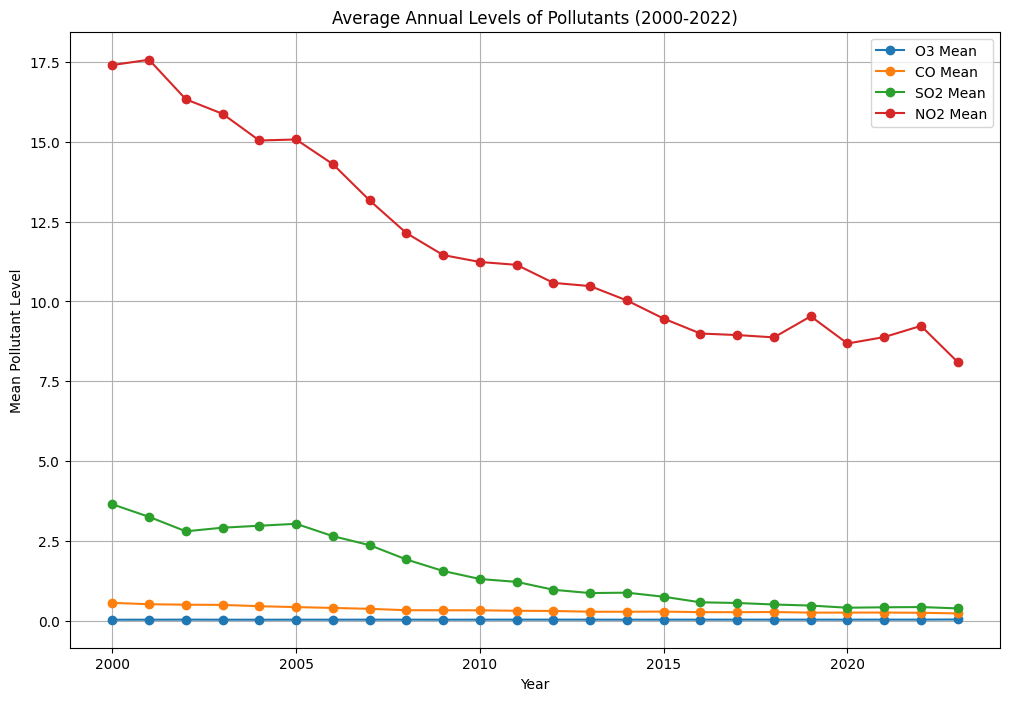

In [35]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year from Date
df['Year'] = df['Date'].dt.year

# Convert relevant columns to numeric, coercing errors
numeric_columns = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values that couldn't be converted
print(df[numeric_columns].dtypes)

# Drop rows with any NaN values in numeric columns (if necessary)
df_clean = df.dropna(subset=numeric_columns)

# Group by Year and calculate mean values for each pollutant
annual_means = df_clean.groupby('Year')[numeric_columns].mean()

# Plotting the trends
annual_means.plot(figsize=(12, 8), marker='o', title='Average Annual Levels of Pollutants (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Pollutant Level')
plt.grid(True)
plt.show()


### Geographical Distribution: 
#### Problem 2: States with the Highest Average Pollutant Levels

In [38]:
# Group by State and calculate mean values for each pollutant
state_means = df.groupby('State').mean(numeric_only=True)[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']]

# Sort the states by the highest average O3 levels and display the top 10
top_states_o3 = state_means.sort_values(by='O3 Mean', ascending=False).head(10)
top_states_o3


,O3 Mean,CO Mean,SO2 Mean,NO2 Mean
State,,,,
Tennessee,0.039083,0.258443,0.367047,1.254657
Wyoming,0.038877,0.110682,0.370953,3.351865
New Mexico,0.035650,0.214087,0.533809,10.438319
South Carolina,0.033644,0.124513,0.813247,2.016696
Nevada,0.033467,0.261808,0.389834,12.567614
Oklahoma,0.032963,0.176805,0.574495,6.533284
Utah,0.032040,0.242020,0.555488,13.773945
Rhode Island,0.032034,0.213029,0.294245,6.319832
South Dakota,0.031504,0.186906,0.474933,4.806641


### Pollutant Comparison Across States
Problem 3: Let's compare the average levels of O3, CO, SO2, and NO2 across different states.

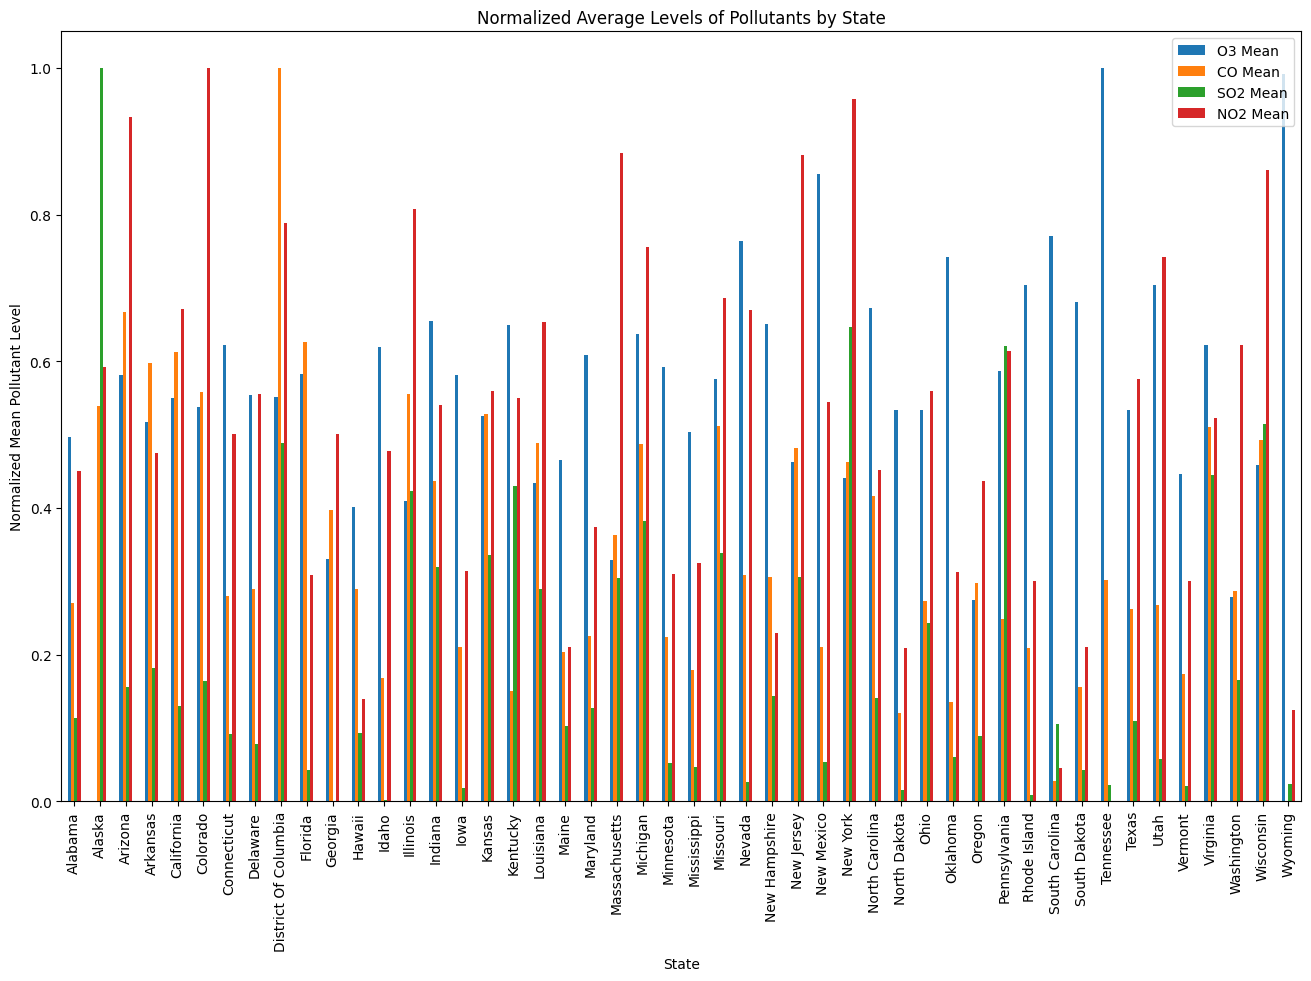

In [41]:
# Normalize the data for better comparison
state_means_normalized = (state_means - state_means.min()) / (state_means.max() - state_means.min())

# Plot the normalized values
state_means_normalized.plot(kind='bar', figsize=(16, 10), title='Normalized Average Levels of Pollutants by State')
plt.xlabel('State')
plt.ylabel('Normalized Mean Pollutant Level')
plt.legend(loc='upper right')
plt.show()


### Seasonal Variation in Pollutant Levels
Problem 4 :To analyze how pollutant levels vary seasonally:

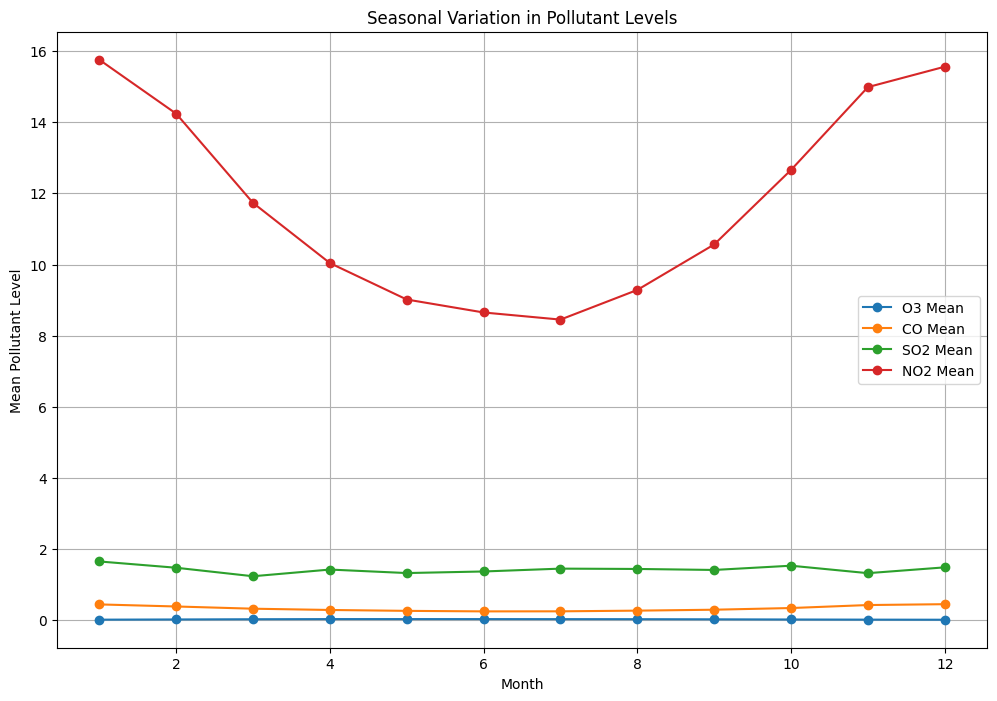

In [43]:
# Extract month from Date
df['Month'] = df['Date'].dt.month

# Convert relevant columns to numeric, coercing errors
numeric_columns = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values in numeric columns (if necessary)
df_clean = df.dropna(subset=numeric_columns)

# Group by Month and calculate mean values for each pollutant
monthly_means = df_clean.groupby('Month')[numeric_columns].mean()

# Plot the seasonal variations
monthly_means.plot(figsize=(12, 8), marker='o', title='Seasonal Variation in Pollutant Levels')
plt.xlabel('Month')
plt.ylabel('Mean Pollutant Level')
plt.grid(True)
plt.show()

#### Correlation Analysis Between Pollutants
Problem 5:Analyze the correlation between different pollutants.

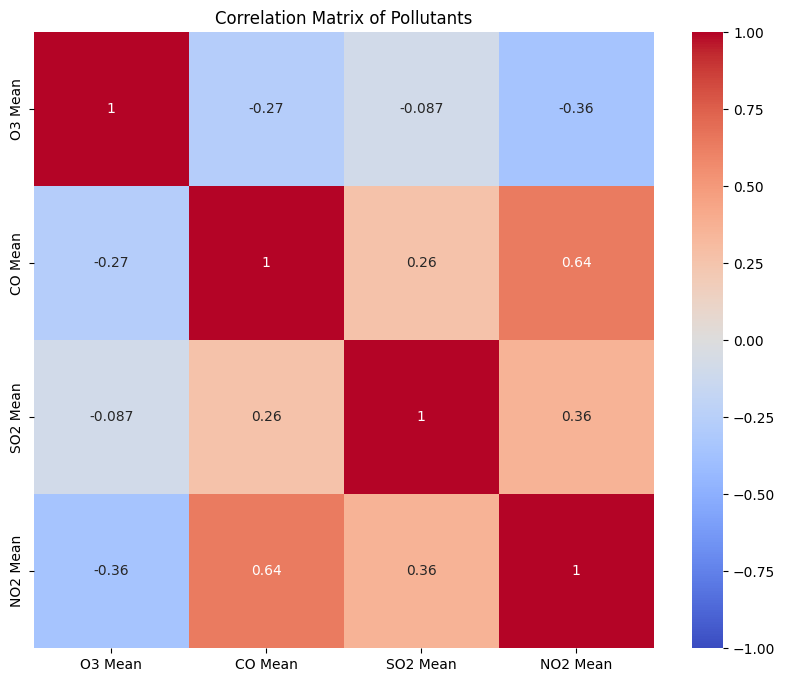

In [45]:
# Calculate correlation matrix
correlation_matrix = df[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']].corr()

# Plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutants')
plt.show()


Problem 6 : Identify the top 10 cities with the highest average Ozone levels throughout the dataset's timeframe.

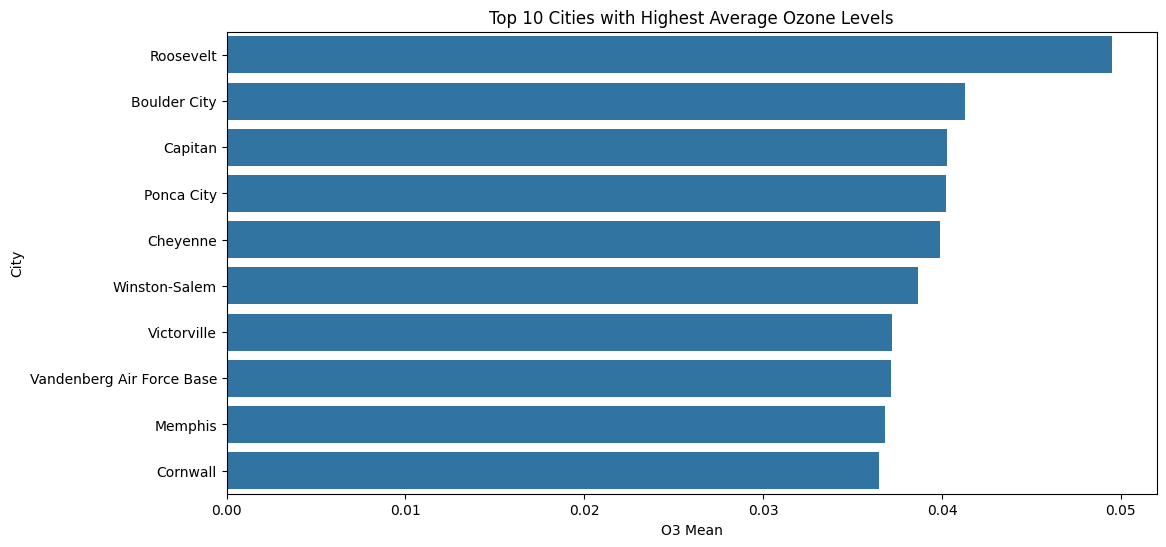

In [46]:
# Calculate the average Ozone levels for each city
avg_ozone_by_city = df.groupby('City')['O3 Mean'].mean()
    
# Sort the cities based on average Ozone levels in descending order
top_10_cities = avg_ozone_by_city.sort_values(ascending=False).head(10).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data = top_10_cities, x = 'O3 Mean', y = 'City')
plt.title('Top 10 Cities with Highest Average Ozone Levels')
plt.show()

Problem 7 : Identify the top 10 cities with the highest and lowest levels of Nitrogen Dioxide (NO2) pollution over the entire dataset period.

C:\Users\kapil\AppData\Local\Temp\ipykernel_1876\480866270.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_no2_cities, x='NO2 Mean', y='City',palette='viridis')


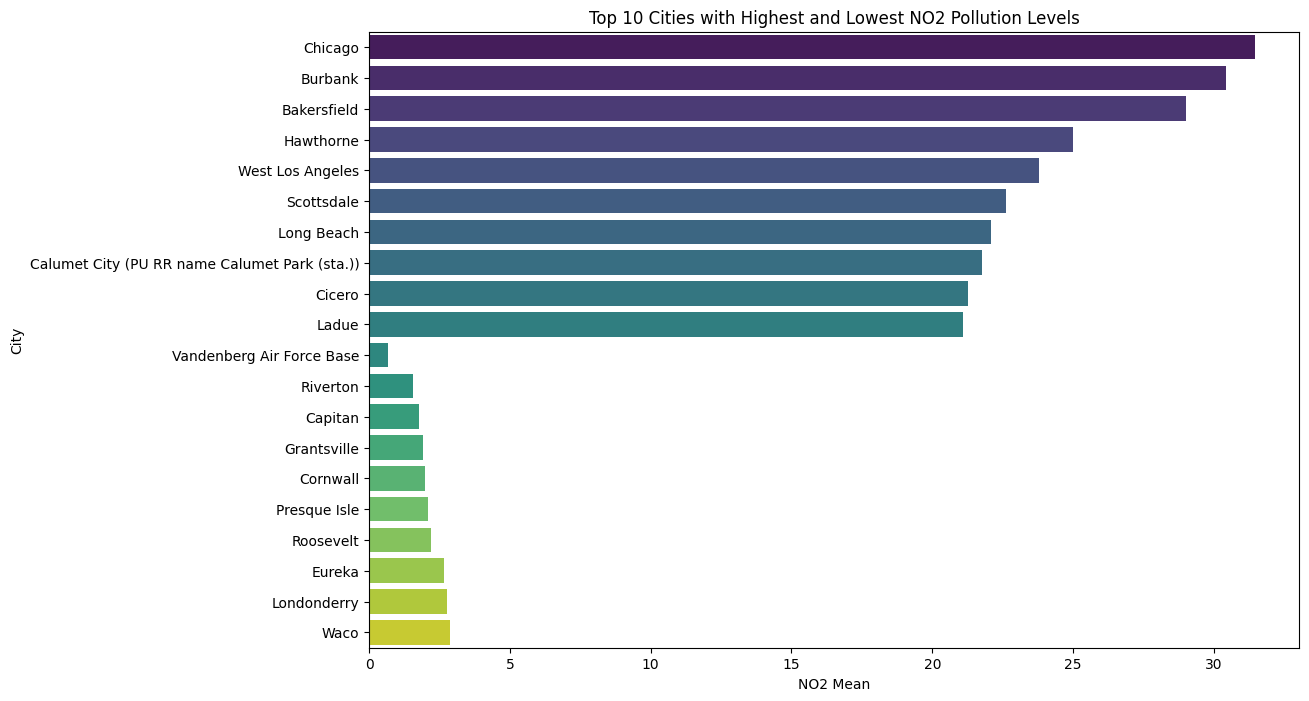

In [47]:
# Filter data for NO2 levels and relevant columns
no2_data = df.loc[:,('City', 'NO2 Mean')]

# Group by city and calculate the mean NO2 levels
mean_no2_by_city = no2_data.groupby('City')['NO2 Mean'].mean().reset_index()

# Sort cities by mean NO2 levels
top_10_highest_no2_cities = mean_no2_by_city.sort_values(by='NO2 Mean', ascending=False).head(10)
top_10_lowest_no2_cities = mean_no2_by_city.sort_values(by='NO2 Mean').head(10)

# Concatenate the top 10 highest and lowest cities
top_10_no2_cities = pd.concat([top_10_highest_no2_cities, top_10_lowest_no2_cities])

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_no2_cities, x='NO2 Mean', y='City',palette='viridis')
plt.title('Top 10 Cities with Highest and Lowest NO2 Pollution Levels')
plt.show()

#### Outliers and Anomalies Detection
Problem 8: Detect outliers and anomalies in the pollutant data.

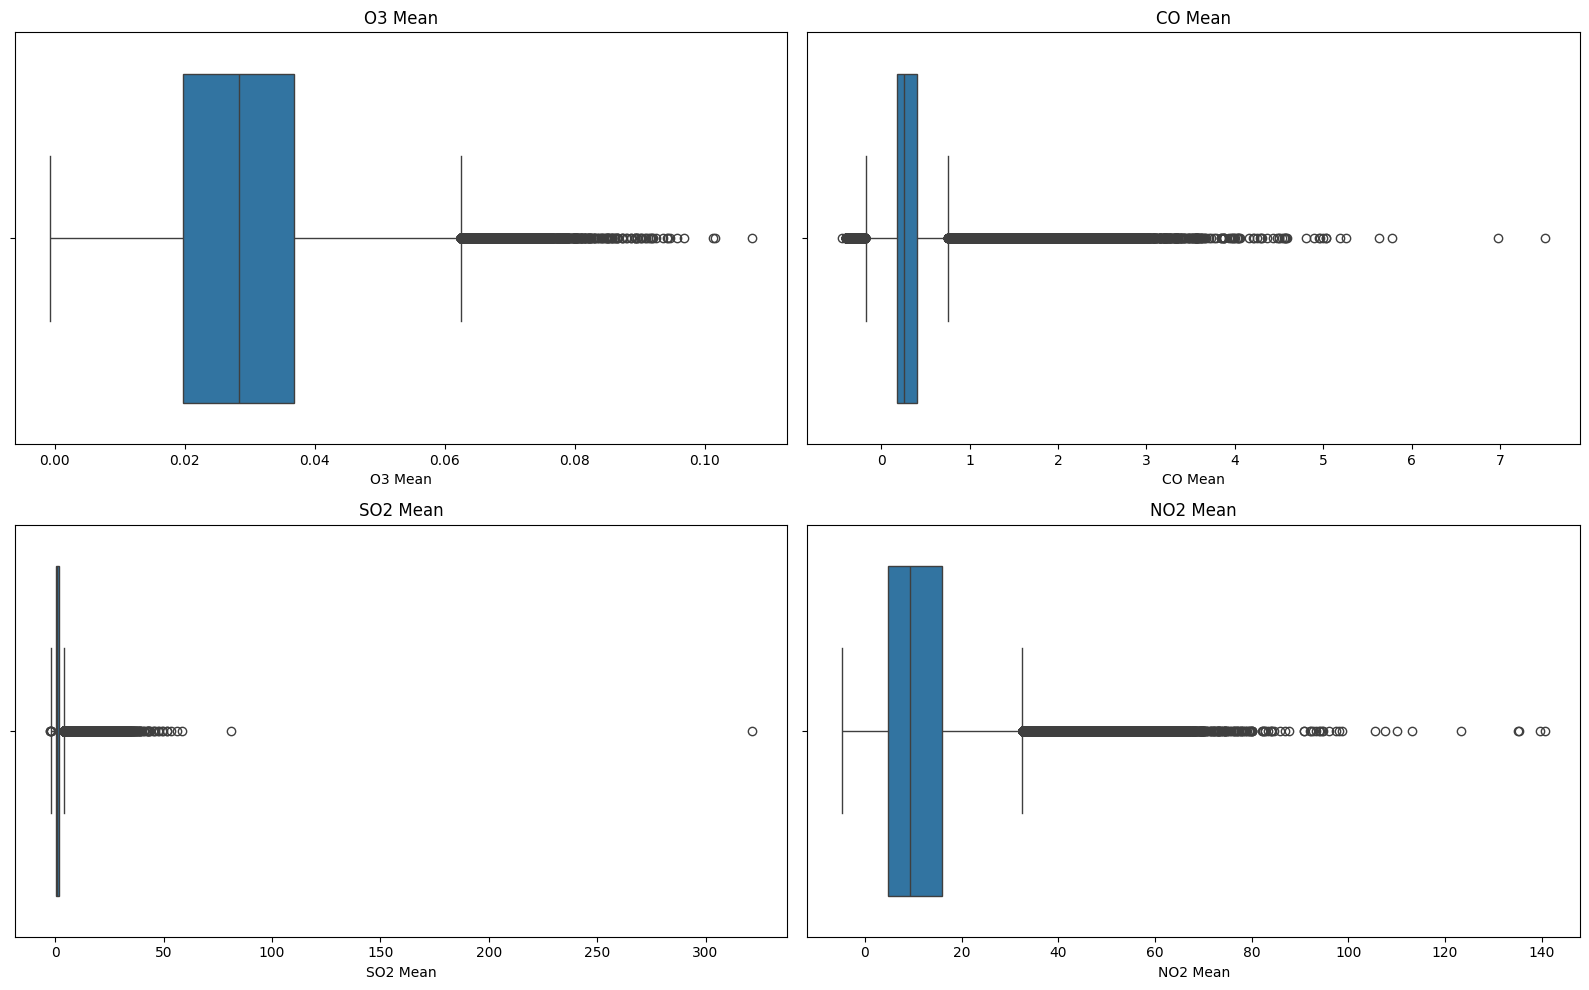

In [48]:
# Using box plots to detect outliers
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='O3 Mean')
plt.title('O3 Mean')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='CO Mean')
plt.title('CO Mean')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='SO2 Mean')
plt.title('SO2 Mean')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='NO2 Mean')
plt.title('NO2 Mean')

plt.tight_layout()
plt.show()


#### Identify Hotspots of Pollution
Problem 9: Identify cities with the highest levels of NO2 pollution

In [50]:
# Convert relevant columns to numeric, coercing errors
numeric_columns = ['NO2 Mean']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values in the 'NO2 Mean' column (if necessary)
df_clean = df.dropna(subset=numeric_columns)

# Group by City and calculate mean NO2 levels
city_no2_means = df_clean.groupby('City')['NO2 Mean'].mean()

# Sort cities by the highest average NO2 levels and display the top 10
top_cities_no2 = city_no2_means.sort_values(ascending=False).head(10)
top_cities_no2


City
Chicago                                          31.451528
Burbank                                          30.431702
Bakersfield                                      29.022370
Hawthorne                                        24.985028
West Los Angeles                                 23.778210
Scottsdale                                       22.619903
Long Beach                                       22.071382
Calumet City (PU RR name Calumet Park (sta.))    21.777969
Cicero                                           21.262820
Ladue                                            21.093291
Name: NO2 Mean, dtype: float64

#### Urban vs. Rural Comparison
Problem 10:Compare pollution levels between urban and rural areas within the same state or county.

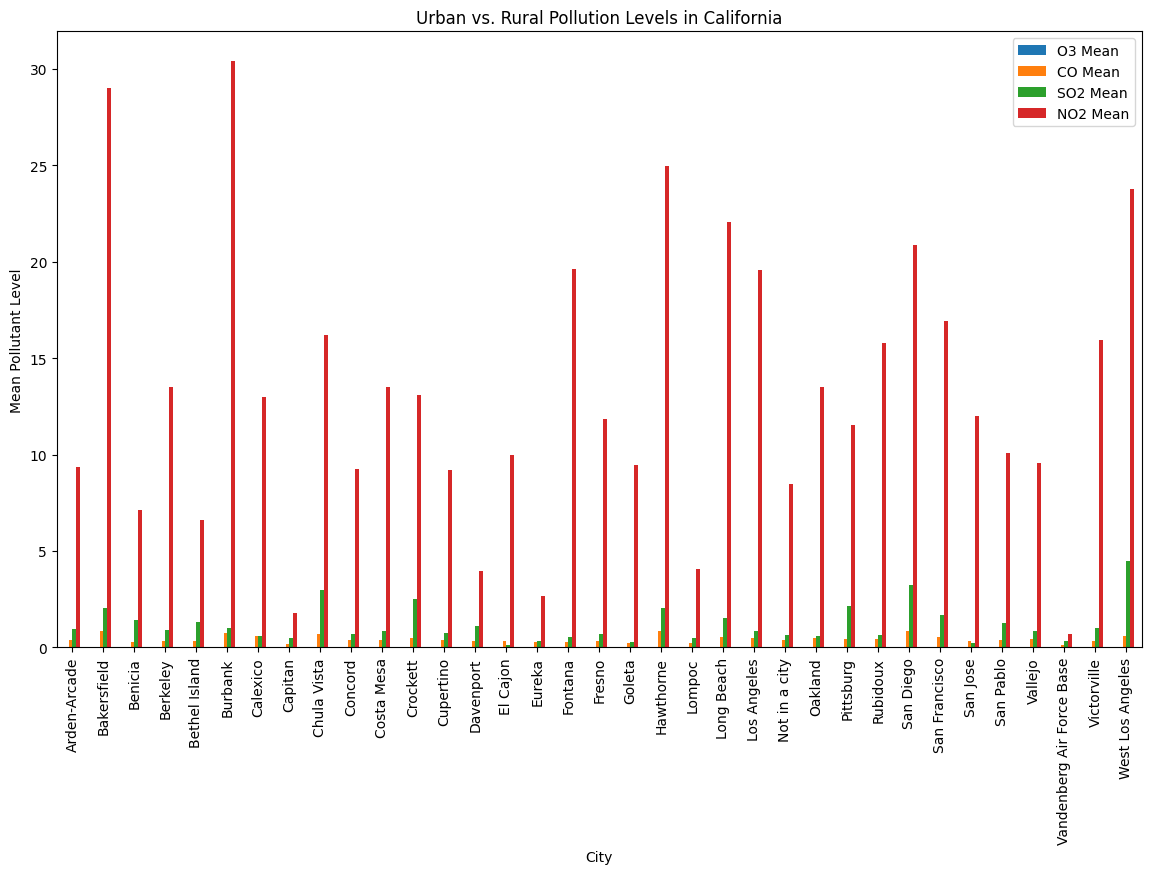

In [52]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert relevant columns to numeric, coercing errors
numeric_columns = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values in numeric columns (if necessary)
df_clean = df.dropna(subset=numeric_columns)

# Group by State and City, then calculate mean values for each pollutant
urban_rural_means = df_clean.groupby(['State', 'City'])[numeric_columns].mean()

# Plotting the comparison for a selected state (e.g., California)
urban_rural_means.loc['California'].plot(kind='bar', figsize=(14, 8), title='Urban vs. Rural Pollution Levels in California')
plt.xlabel('City')
plt.ylabel('Mean Pollutant Level')
plt.show()

Problem 11 : Calculate daily, monthly, and yearly averages of each air pollutant (NO2, SO2, CO, O3) across all states.

In [54]:
# Adding month and day in dataset
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [55]:
data = df.loc[:,('Day','Month','Year','O3 Mean','CO Mean','SO2 Mean','NO2 Mean')]
def calculate_averages(data):
    
    # Calculate daily averages
    daily_averages = data.groupby(['Year', 'Month','Day']).mean().reset_index()
    
    # Calculate monthly averages
    monthly_averages = data.groupby(['Year','Month']).mean().reset_index()
    
    # Calculate yearly averages
    yearly_averages = data.groupby('Year').mean().reset_index()
    
    return daily_averages, monthly_averages, yearly_averages

# Calculate averages
daily_avg, monthly_avg, yearly_avg = calculate_averages(data)

# Print the results
print("Daily Averages:")
print(daily_avg.head())
print("\nMonthly Averages:")
print(monthly_avg.head())
print("\nYearly Averages:")
print(yearly_avg.head())

Daily Averages:
   Year  Month  Day   O3 Mean   CO Mean  SO2 Mean   NO2 Mean
0  2000      1    1  0.020742  0.773897  4.346910  18.508666
1  2000      1    2  0.021207  0.590316  3.438415  14.692258
2  2000      1    3  0.013568  0.880811  3.390395  23.830700
3  2000      1    4  0.013322  1.006128  2.758615  24.160910
4  2000      1    5  0.016361  1.009010  3.006528  23.804671

Monthly Averages:
   Year  Month        Day   O3 Mean   CO Mean  SO2 Mean   NO2 Mean
0  2000      1  16.118017  0.014521  0.948309  3.866951  23.425019
1  2000      2  14.895746  0.021125  0.715586  3.426367  20.960138
2  2000      3  16.300063  0.027074  0.537657  3.161874  17.715628
3  2000      4  15.586100  0.030665  0.469062  3.377199  16.140980
4  2000      5  16.091484  0.034551  0.421474  3.389836  15.031685

Yearly Averages:
   Year        Day     Month   O3 Mean   CO Mean  SO2 Mean   NO2 Mean
0  2000  15.761562  6.667127  0.026569  0.554411  3.643767  17.404993
1  2001  15.769339  6.730470  0.027640 

#### Problem 12: What is the distribution of the Air Quality Index (AQI) for each pollutant over the years?

	This question aims to analyze the distribution of AQI for Ozone (O3), Carbon Monoxide (CO), Sulphur Dioxide (SO2), and Nitrogen Dioxide (NO2) over the entire period (2000-2022).

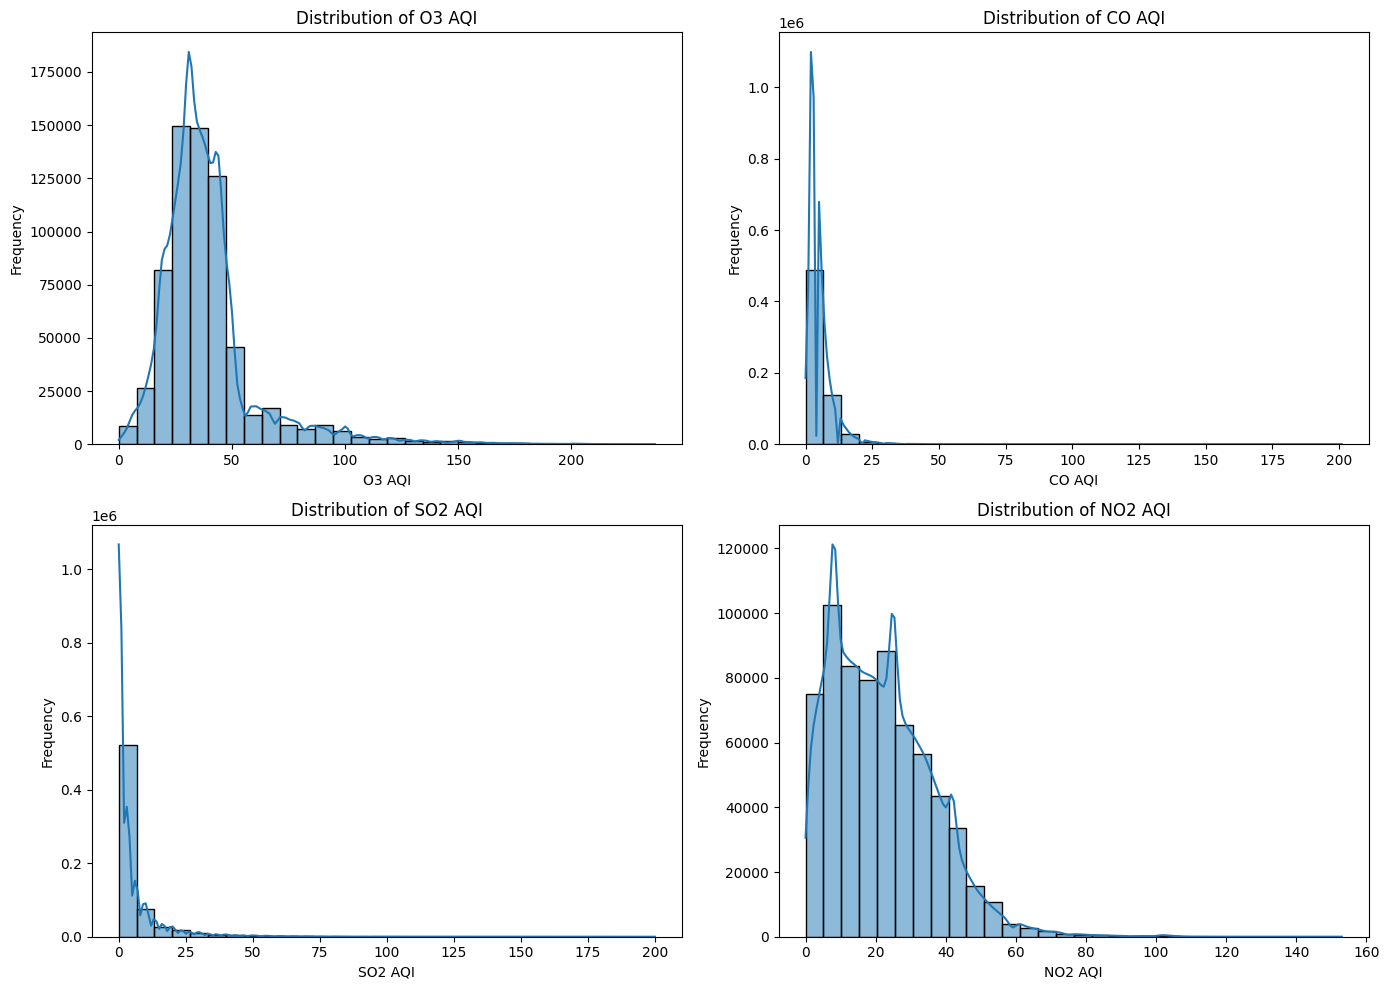

In [23]:
import seaborn as sns

# Ensure columns are numeric, coercing errors to NaN and then dropping NaNs
aqi_columns = ['O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']
df_clean[aqi_columns] = df_clean[aqi_columns].apply(pd.to_numeric, errors='coerce')
df_clean = df_clean.dropna(subset=aqi_columns)

# Plotting the distribution of AQI for each pollutant
plt.figure(figsize=(14, 10))

# O3 AQI
plt.subplot(2, 2, 1)
sns.histplot(df_clean['O3 AQI'], kde=True, bins=30)
plt.title('Distribution of O3 AQI')
plt.xlabel('O3 AQI')
plt.ylabel('Frequency')

# CO AQI
plt.subplot(2, 2, 2)
sns.histplot(df_clean['CO AQI'], kde=True, bins=30)
plt.title('Distribution of CO AQI')
plt.xlabel('CO AQI')
plt.ylabel('Frequency')

# SO2 AQI
plt.subplot(2, 2, 3)
sns.histplot(df_clean['SO2 AQI'], kde=True, bins=30)
plt.title('Distribution of SO2 AQI')
plt.xlabel('SO2 AQI')
plt.ylabel('Frequency')

# NO2 AQI
plt.subplot(2, 2, 4)
sns.histplot(df_clean['NO2 AQI'], kde=True, bins=30)
plt.title('Distribution of NO2 AQI')
plt.xlabel('NO2 AQI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Problem 13: How do the mean levels of each pollutant vary by season (Spring, Summer, Fall, Winter)?

	This question aims to explore the seasonal variations in the mean levels of Ozone (O3), Carbon Monoxide (CO), Sulphur Dioxide (SO2), and Nitrogen Dioxide (NO2).

O3 Mean     float64
CO Mean     float64
SO2 Mean    float64
NO2 Mean    float64
dtype: object


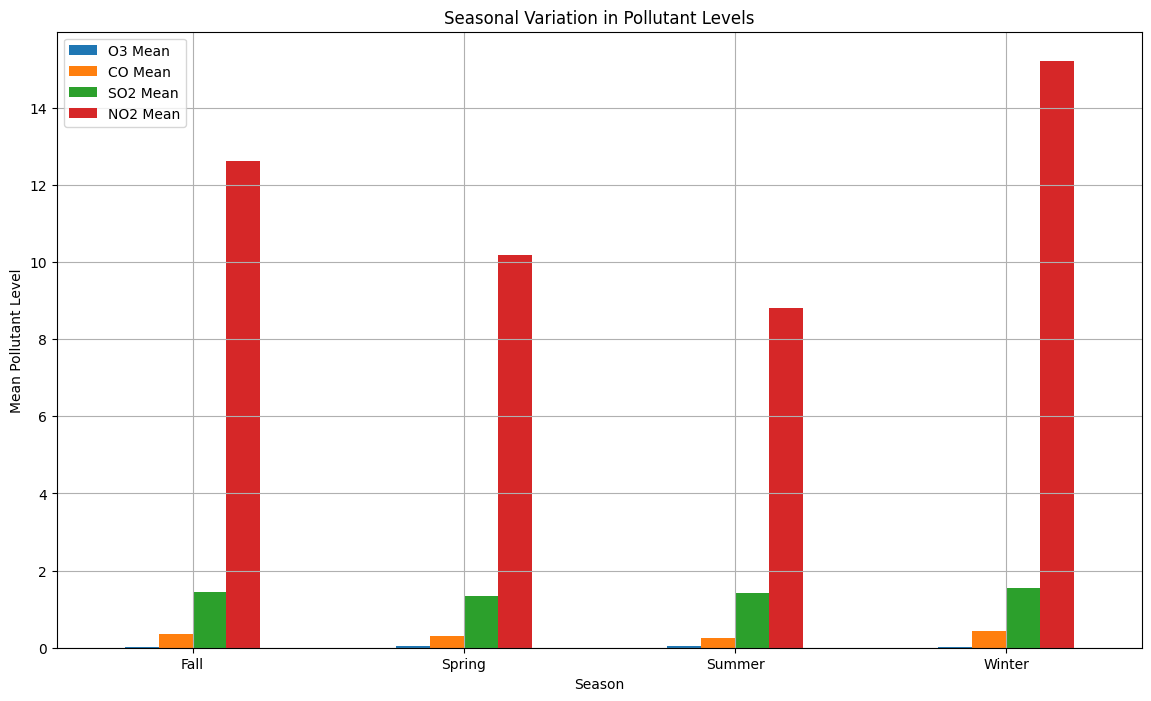

In [27]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month from Date
df['Month'] = df['Date'].dt.month

# Define seasons based on months
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Add a season column
df['Season'] = df['Month'].apply(get_season)

# Ensure columns are numeric, coercing errors to NaN and then dropping NaNs
pollutant_columns = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
df[pollutant_columns] = df[pollutant_columns].apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna(subset=pollutant_columns + ['Season'])

# Verify data types
print(df_clean[pollutant_columns].dtypes)

# Group by Season and calculate mean values for each pollutant
seasonal_means = df_clean.groupby('Season')[pollutant_columns].mean()

# Plotting the seasonal variations
seasonal_means.plot(kind='bar', figsize=(14, 8), title='Seasonal Variation in Pollutant Levels')
plt.xlabel('Season')
plt.ylabel('Mean Pollutant Level')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


## Machine Learning Model 

##### Problem 14:Linear Regression model to predict the average NO2 levels based on date features (year, month).

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('../data/pollution_2000_2023.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year and month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Convert relevant columns to numeric, coercing errors
numeric_columns = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values in relevant columns
df_clean = df.dropna(subset=numeric_columns + ['Year', 'Month'])

# Select features and target variable
X = df_clean[['Year', 'Month']]
y = df_clean['NO2 Mean']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [6]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train RMSE: 8.546798872811287
Test RMSE: 8.540854680565833


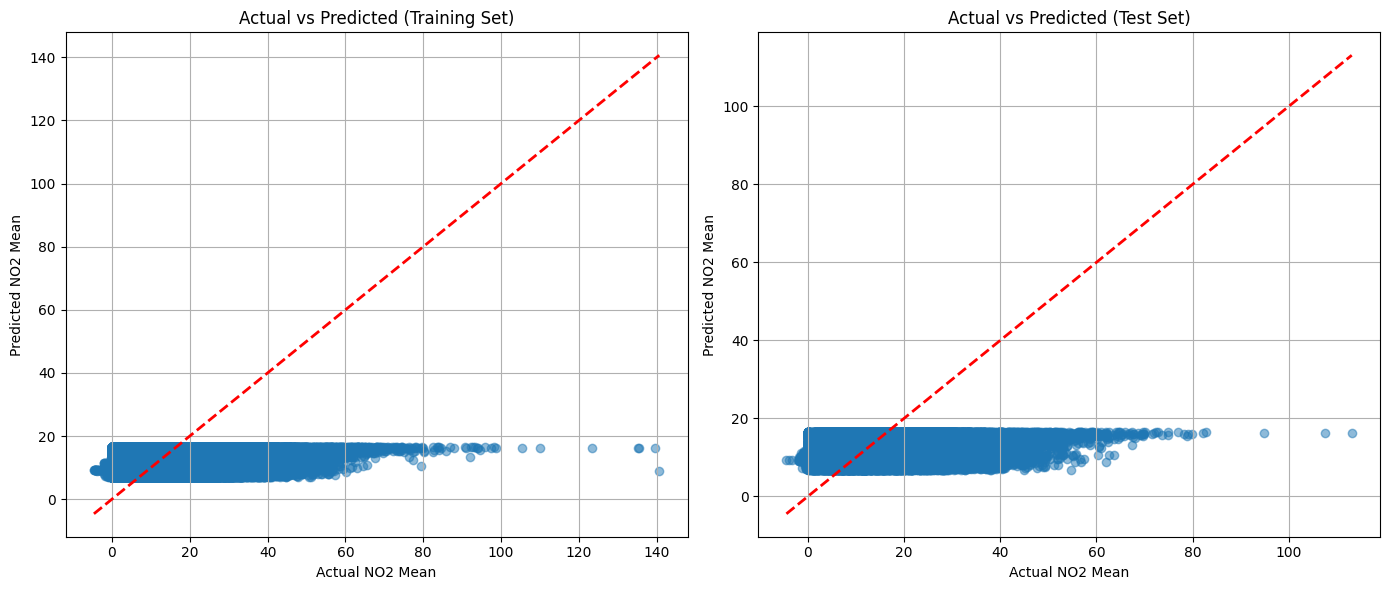

In [7]:
# Plotting actual vs predicted values for the training set
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual NO2 Mean')
plt.ylabel('Predicted NO2 Mean')
plt.title('Actual vs Predicted (Training Set)')
plt.grid(True)

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual NO2 Mean')
plt.ylabel('Predicted NO2 Mean')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Problem 15:  Build a predictive model in Python to forecast O3 Mean levels for the next year based on historical data from 2000-2022.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('../data/pollution_2000_2023.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year and month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Convert relevant columns to numeric, coercing errors
numeric_columns = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values in relevant columns
df_clean = df.dropna(subset=numeric_columns + ['Year', 'Month'])


In [11]:
# Create lag features for O3 Mean
df_clean['O3 Mean Lag1'] = df_clean['O3 Mean'].shift(1)
df_clean['O3 Mean Lag2'] = df_clean['O3 Mean'].shift(2)
df_clean['O3 Mean Lag3'] = df_clean['O3 Mean'].shift(3)

# Drop rows with NaN values due to lagging
df_clean = df_clean.dropna()

# Select features and target variable
X = df_clean[['Year', 'Month', 'O3 Mean Lag1', 'O3 Mean Lag2', 'O3 Mean Lag3']]
y = df_clean['O3 Mean']


In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


Train RMSE: 0.0078543513480357
Test RMSE: 0.007826618947392327


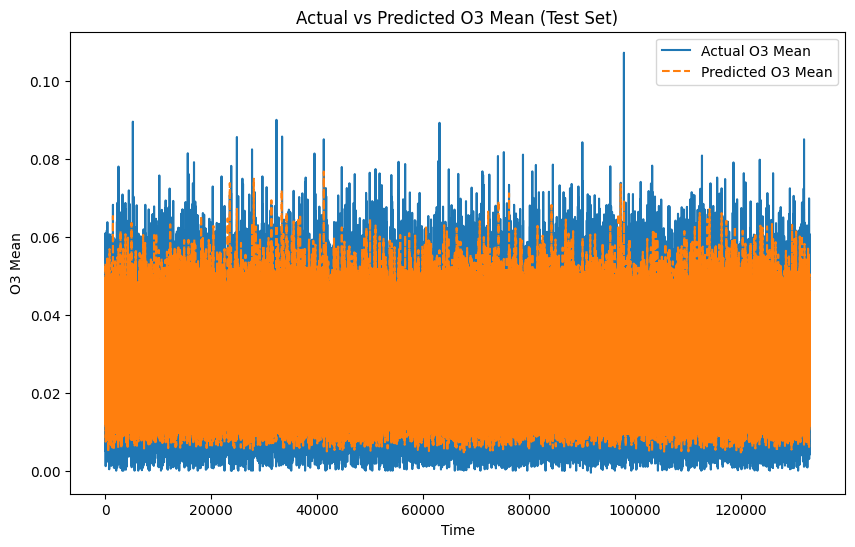

In [14]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Plotting actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual O3 Mean')
plt.plot(y_pred_test, label='Predicted O3 Mean', linestyle='--')
plt.xlabel('Time')
plt.ylabel('O3 Mean')
plt.title('Actual vs Predicted O3 Mean (Test Set)')
plt.legend()
plt.show()


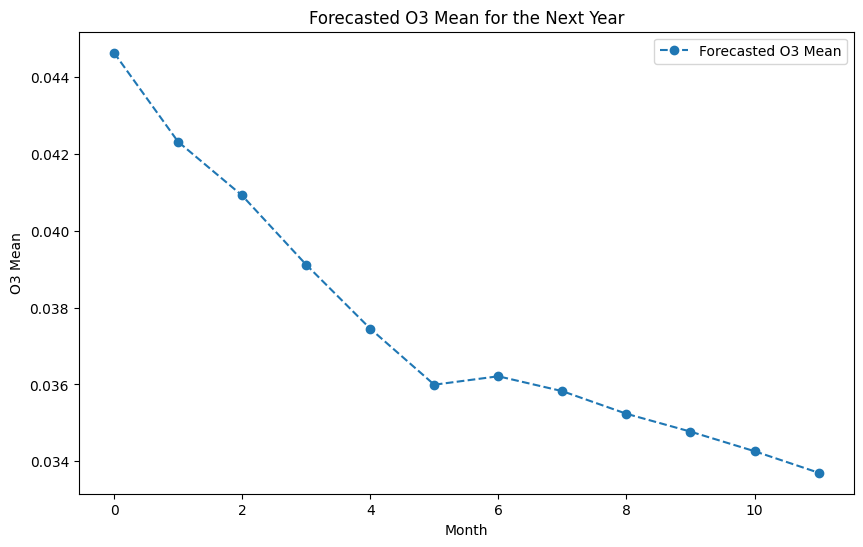

In [20]:
# Get the last available data point
last_data_point = df_clean[['Year', 'Month', 'O3 Mean Lag1', 'O3 Mean Lag2', 'O3 Mean Lag3']].iloc[-1]

# Initialize list to store forecasts
forecasts = []

# Forecast for the next 12 months
for i in range(12):
    # Increment month and year
    next_month = last_data_point['Month'] + 1
    next_year = last_data_point['Year']
    if next_month > 12:
        next_month = 1
        next_year += 1

    # Prepare the data for prediction
    data_for_prediction = pd.DataFrame({
        'Year': [next_year],
        'Month': [next_month],
        'O3 Mean Lag1': [last_data_point['O3 Mean Lag1']],
        'O3 Mean Lag2': [last_data_point['O3 Mean Lag2']],
        'O3 Mean Lag3': [last_data_point['O3 Mean Lag3']]
    })
    
    # Predict
    next_forecast = model.predict(data_for_prediction)[0]
    
    # Append to forecasts
    forecasts.append(next_forecast)
    
    # Update last_data_point for next prediction
    last_data_point = {
        'Year': next_year,
        'Month': next_month,
        'O3 Mean Lag1': next_forecast,
        'O3 Mean Lag2': last_data_point['O3 Mean Lag1'],
        'O3 Mean Lag3': last_data_point['O3 Mean Lag2']
    }

# Plot the forecasts
plt.figure(figsize=(10, 6))
plt.plot(forecasts, marker='o', linestyle='--', label='Forecasted O3 Mean')
plt.xlabel('Month')
plt.ylabel('O3 Mean')
plt.title('Forecasted O3 Mean for the Next Year')
plt.legend()
plt.show()

## Conclusion

Temporal Trends: There are noticeable temporal trends in air pollutant levels over the years. Some pollutants may exhibit seasonal patterns, while others may show long-term trends.

Geographical Variations: Air pollutant levels vary significantly across different states and cities in the United States. Certain regions may consistently exhibit higher or lower levels of pollutants compared to others.

Outlier Detection: Outliers or extreme events in air pollutant levels can be identified and analyzed using visualization techniques such as box plots. These outliers may be indicative of unusual environmental conditions or specific events affecting air quality.

Predictive Modeling: Predictive models, such as linear regression, can be used to forecast future air pollutant levels based on historical data. These models can provide valuable insights for decision-making and planning related to environmental health and pollution control.

Policy Implications: The analysis of air quality data can inform the development of environmental policies and regulations aimed at reducing air pollution and mitigating its adverse effects on public health and the environment.


Overall, the dataset provides valuable information for understanding air quality trends, identifying areas of concern, and guiding efforts to improve air quality and public health outcomes. 